# Computer Vision - Assignment 3

## 1. Perform Dense SIFT-based matching on the given pairs of images..

In [43]:
import cv2
import numpy as np
from skimage import filters
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.util.shape import view_as_blocks
from scipy.spatial.distance import cdist
from scipy.ndimage.filters import convolve
from skimage.feature import corner_peaks
from scipy import signal
%matplotlib inline
plt.rcParams['figure.figsize'] = (18.0, 12.0)  # set default size of plots
plt.rcParams['image.cmap'] = 'gray'

**SIFT vs Dense SIFT**

**SIFT**  is used to find matches between two overlapping images
1. SIFT stands for Stands for scale invariant feature transform .
1. SIFT has both feature **detector** and **descriptor**
1. Similar to the one used in primate visual system (human, ape, monkey, etc.)
1. SIFT is invented by David Lowe
1. In SIFT we get a SIFT descriptions at the locations determined by Lowe's algorithm

Dense SIFT 
1. SIFT consists of both detection and description while Dense-SIFT only uses the **descriptor** in densely sampled locations 
1. Dense SIFT collects more features at each location and scale in an image, increasing recognition accuracy accordingly
1. Better results are obtained using dense feature extraction rather than keypoint-based feature extraction
1. Therefore Dense SIFT feature means that we are calculating the SIFT descriptor for each and every pixel or predefined   grid of patches in the image. 

**SIFT** 

 We use get  both **Keypoints** and  **Descriptors** using a single function 
    **sift.detectAndCompute(img,None)**
    
**Dense SIFT** 

 We generate **Keypoints** using a custome function and  feed them to 
    **sift.Compute(img,None)** to get descriptors 
        

In [44]:
def generateDenseKeypoints(width,height,step_size):
    
    '''
     Genrate Dense Keypoints

    :param width     integer: width of the image
    :param height    integer: height of the image
    :param step_size integer: grid spacing-between keypoints

    :return: cv2.KeyPoint()
    '''
   
    keypoints = [cv2.KeyPoint(x, y, step_size) for y in range(step_size,height, step_size)
                                        for x in range(step_size, width, step_size)]
    return keypoints


**Helper functions**

In [45]:

def getColorSpaces(image):  
    rgb = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)  
    
    return rgb,gray
    
def getImageDimnesion(image):    
    height,width = image.shape[:2]
    
    return height,width

def showImage(image,title):    
    plt.imshow(image,cmap='gray')
    plt.axis('off')
    plt.title(title)
      
def getSubImage(img,left,right,top,bottom):
    
    return img[top:bottom, left:right].astype(np.float32)

In [48]:
def getDenseSIFTMatches(imgL,keypoints1_dense,imgR,keypoints2_dense,step_size=40):
   
    rgbL,grayL=getColorSpaces(imgL)
    rgbR,grayR=getColorSpaces(imgR)
    
    #SIFT , Compute descriptors using dense keypoints
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints1_sift,desc1 = sift.compute(grayL,keypoints1_dense)
    keypoints2_sift,desc2 = sift.compute(grayR,keypoints2_dense)

   # BFMatcher with default params
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(desc1,desc2, k=2)
    # Apply ratio test
    good_matches = []

    good=[]

    for m,n in matches:
        if m.distance < 0.8*n.distance:
            good_matches.append([m])
            good.append(m)
            
    return good_matches   

In [ ]:
# Read the images
img = cv2.imread(r'Stereo Images\Stereo_Pair1.jpg')

height,width = img.shape[:2]
width_cutoff = width // 2
imgL = img[:, :width_cutoff]
imgR = img[:, width_cutoff:]


Original Images

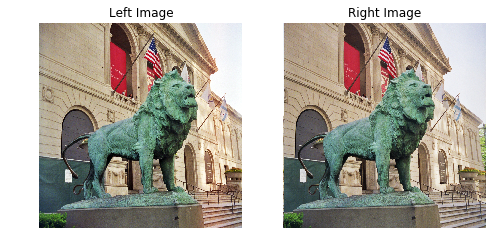

In [50]:
#imgL=cv2.imread(r'Stereo Images\tsucuba_left.png')
#imgR=cv2.imread(r'Stereo Images\tsucuba_right.png')
rgbL,grayL=getColorSpaces(imgL)
rgbR,grayR=getColorSpaces(imgR)

#Display the images
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
showImage(rgbL,'Left Image')
plt.subplot(1,2,2)
showImage(rgbR,'Right Image')
plt.show()

Dense SIFT Keypoints generated

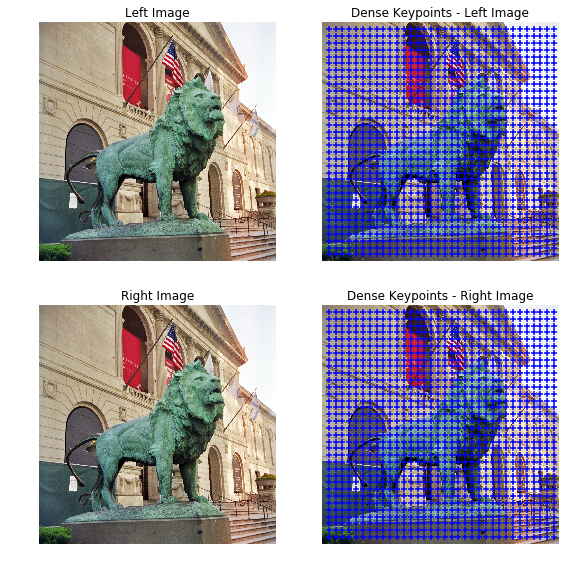

In [52]:

keypointsL_dense=generateDenseKeypoints(w1,h1,step_size)
keypointsR_dense=generateDenseKeypoints(w2,h2,step_size)
    
h1,w1 = imgL.shape[:2]
h2,w2 = imgR.shape[:2]

x_vals1=[kp.pt[0] for kp in keypoints1_dense]
y_vals1=[kp.pt[1] for kp in keypoints1_dense]
x_vals2=[kp.pt[0] for kp in keypoints2_dense]
y_vals2=[kp.pt[1] for kp in keypoints2_dense]

plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
showImage(rgbL,'Left Image')

plt.subplot(2,2,2)
showImage(rgbL,'Dense Keypoints - Left Image')
plt.scatter(x_vals1,y_vals1, marker='+',c='b')

plt.subplot(2,2,3)
showImage(rgbL,'Right Image')

plt.subplot(2,2,4)
showImage(rgbL,'Dense Keypoints - Right Image')
plt.scatter(x_vals2,y_vals2, marker='+',c='b')

plt.tight_layout()
plt.show()


Feed these dense keypoints to SIFT descriptor

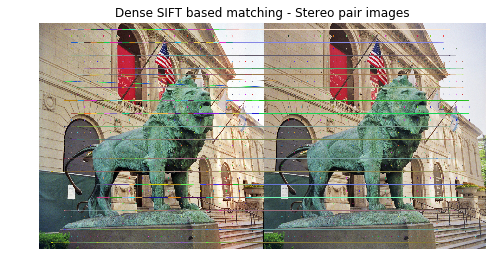

In [54]:
    
dense_matches=getDenseSIFTMatches(imgL,keypointsL_dense,imgR,keypointsR_dense,40)

# cv.drawMatchesKnn expects list of lists as matches.
img_matches = cv2.drawMatchesKnn(rgbL,keypointsL_dense,rgbR,keypointsR_dense,dense_matches,None,flags=2)
plt.figure(figsize=(8,8))
showImage(img_matches,'Dense SIFT based matching - Stereo pair images')
plt.show()

**Dense SIFT**

When applying the SIFT descriptor to tasks such as object category classification or scene classification, experimental 
evaluations show that better classification results are often obtained by computing the SIFT descriptor over dense grids in the
image domain as opposed to at sparse interest points as obtained by an interest operator. A basic explanation for this is that 
a larger set of local image descriptors computed over a dense grid usually provide more information than corresponding 
descriptors evaluated at a much sparser set of image points.This direction of development was initiated by Bosch et al. 
(2006, 2007) and has now established itself as a state-of-the-art approach for visual object category classification.
When applied to object categorization tasks in practice, the computation of dense SIFT descriptors is usually accompanied 
with a clustering stage, where the individual SIFT descriptors are reduced to a smaller vocabulary of visual words, which can 
then be combined with a bag-of-words model or related methods (Csurka et al. 2004, Lazebnik et al. 2006).For the task of 
establishing image correspondences between initially unrelated different images of a 3-D object or a 3-D scene, the detection 
of sparse interest points is, however, still important an important pre-processing step to keep down the complexity when
establishing image correspondences.

Reference- http://www.scholarpedia.org/article/Scale_Invariant_Feature_Transform#Dense_SIFT